# Multiple Linear Regression 

In [4]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Reading the Data set 

In [86]:
advertising=pd.read_csv("advertising.csv")

### Inspecting the data 

In [88]:
advertising.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [90]:
advertising.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [92]:
advertising.shape

(200, 4)

In [94]:
advertising.size

800

In [96]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [98]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**There are no null values in the dataset.**

In [100]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Checking for Linearity wrt each column

**1.By Plotting scatter pair plot.**

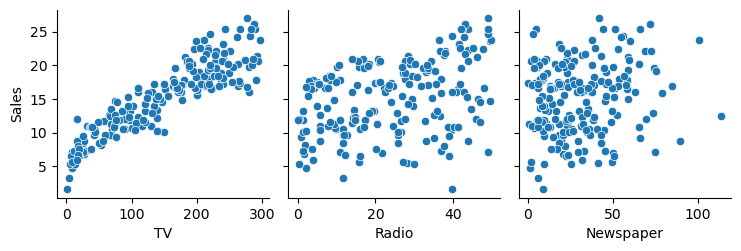

In [264]:
sns.pairplot(diag_kind=None, data= advertising, x_vars=["TV","Radio","Newspaper"], y_vars="Sales")
plt.show()

**2. By heatmap.**

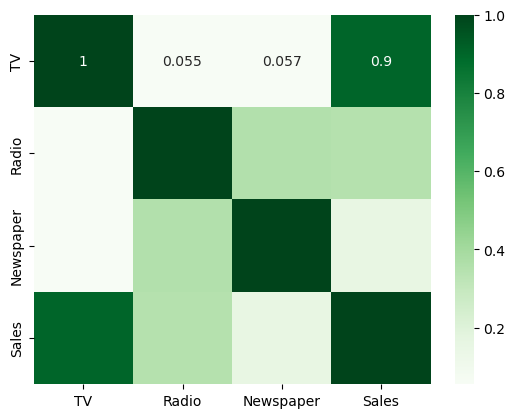

In [190]:
sns.heatmap(advertising.corr(), cmap="Greens",annot=True)
plt.show()

### Assign to Train and Test 

In [196]:
X=advertising[["TV","Radio","Newspaper"]]
y=advertising["Sales"]

In [198]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [200]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

**Dividing the data into train and test.**

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7, random_state=100)

In [202]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


**Adding Constants**

In [247]:
X_train_sm=sm.add_constant(X_train)

In [249]:
X_train_sm

,const,TV,Radio,Newspaper
74,1.0,213.4,24.6,13.1
3,1.0,151.5,41.3,58.5
185,1.0,205.0,45.1,19.6
26,1.0,142.9,29.3,12.6
90,1.0,134.3,4.9,9.3
...,...,...,...,...
87,1.0,110.7,40.6,63.2
103,1.0,187.9,17.2,17.9
67,1.0,139.3,14.5,10.2
24,1.0,62.3,12.6,18.3


**Ordinary Least square(OLS)**

In [208]:
lr=sm.OLS(y_train,X_train_sm).fit()

In [210]:
lr.params

const        4.334596
TV           0.053829
Radio        0.110012
Newspaper    0.006290
dtype: float64

In [212]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           4.73e-71
Time:                        10:56:34   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.000       3.628       5.041
TV             0.0538      0.002     34.539      0.000       0.051       0.057
Radio          0.1100      0.010     10.609      0.000       0.090       0.131
Newspaper      0.0063      0.007      0.902      0.369      -0.008       0.020
==============================================================================
Omnibus:                       18.669   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                          -0.643   Prob(JB):                     1.52e-07
Kurtosis:                       4.932   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Finding y predicted**

In [294]:
#Alternate way
#y_pred=( m1*x1 + m2*x2 + m3*x3 ) + c
#y_pred = 0.054546 * (X_train["TV"]) + 0.110012 * (X_train["Radio"]) + 0.006290 * (X_train["Newspaper"]) + 4.334596

In [214]:
y_pred=lr.predict(X_train_sm)

In [216]:
y_pred

74     18.610427
3      17.401174
185    20.454398
26     15.329388
90     12.161402
         ...    
87     15.157500
103    16.453886
67     13.492326
24      9.189410
8       5.034842
Length: 140, dtype: float64

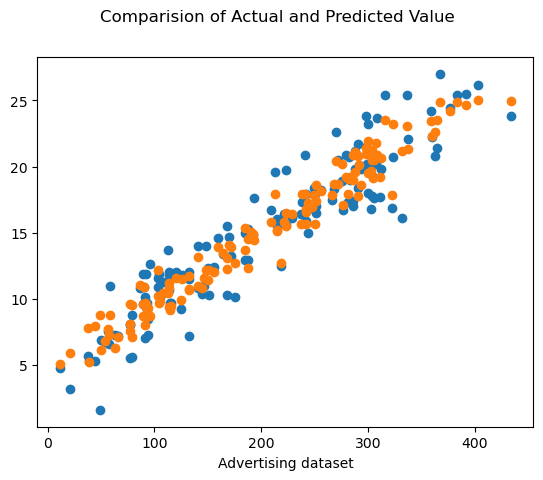

In [218]:
plt.scatter(((X_train["TV"])+(X_train["Radio"])+(X_train["Newspaper"])),y_train,label="Actual")
plt.scatter(((X_train["TV"])+(X_train["Radio"])+(X_train["Newspaper"])),y_pred,label="Predicted")
plt.suptitle("Comparision of Actual and Predicted Value")
plt.xlabel("Advertising dataset")
plt.show()

**Getting Errors**

In [220]:
res=(y_train-y_pred)
res

74    -1.610427
3     -0.901174
185    2.145602
26    -0.329388
90     1.838598
         ...   
87     0.842500
103    3.246114
67    -0.092326
24     0.510590
8     -0.234842
Length: 140, dtype: float64

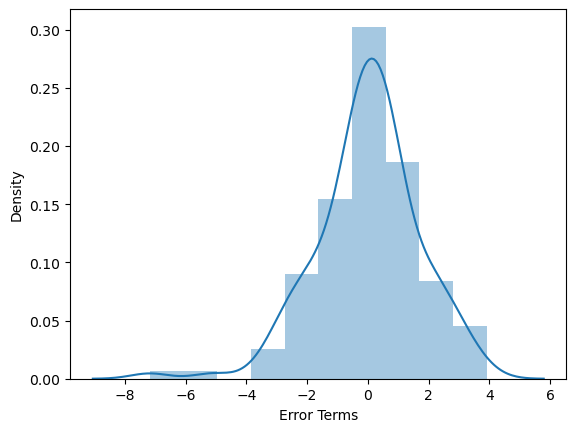

In [222]:
sns.distplot(res, bins=10)
plt.xlabel("Error Terms")
plt.show()

**For Test data**

In [243]:
X_test_sm = sm.add_constant(X_test)

In [245]:
X_test_sm

,const,TV,Radio,Newspaper
126,1.0,7.8,38.9,50.6
104,1.0,238.2,34.3,5.3
99,1.0,135.2,41.7,45.9
92,1.0,217.7,33.5,59.0
111,1.0,241.7,38.0,23.2
167,1.0,206.8,5.2,19.4
116,1.0,139.2,14.3,25.6
96,1.0,197.6,3.5,5.9
52,1.0,216.4,41.7,39.6
69,1.0,216.8,43.9,27.2


In [228]:
y_test_pred = lr.predict(X_test_sm)

In [230]:
y_test_pred

126     9.352211
104    20.963446
99     16.488511
92     20.109710
111    21.671484
167    16.160544
116    13.561806
96     15.393381
52     20.819808
69     21.005371
164    12.294513
124    20.708486
182     8.173673
154    16.824715
125    10.489548
196     9.995306
194    16.346989
177    14.575812
163    17.230651
31     12.568907
11     18.557159
73     12.124028
15     20.433126
41     17.780178
97     16.736234
128    21.603876
133    20.135321
82     10.825600
139    19.127828
123    14.845378
83     13.135974
65      9.077579
151    12.078341
162    16.628244
170     8.417928
77     14.045670
32      9.920502
173    14.261016
174    16.762630
85     17.171855
168    18.887976
112    15.501655
171    15.786884
181    16.862667
7      13.034058
46     10.476739
75     10.614164
28     20.852650
29     10.151757
195     6.884714
40     17.887026
153    18.160139
115    12.559071
64     16.281896
59     18.980247
1      11.337149
192     5.910269
136    10.061595
152    17.6238

**Predicting the Accuracy**

In [232]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

1.6235998775338947

In [234]:
Accuracy=r2_score(y_test,y_test_pred)

In [236]:
Percentage=Accuracy*100

In [238]:
print("The prediction is",Percentage,"% Accurate.")

The prediction is 86.55979373420266 % Accurate.


Text(0.5, 0.98, 'Actual and Predicted Sales')

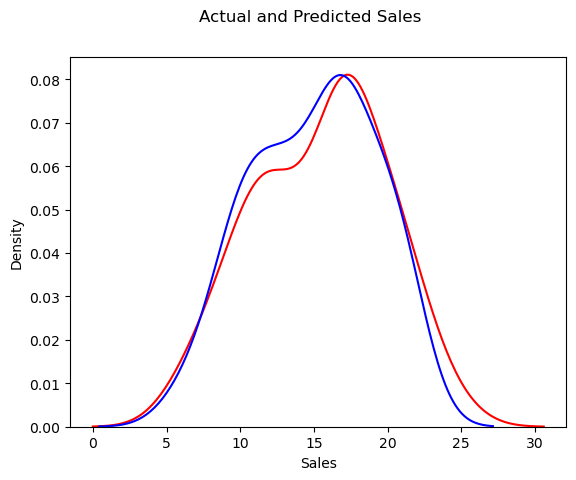

In [240]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.suptitle("Actual and Predicted Sales")

## Inferences

**1. We took the data of TV, Radio and Newspaper to predict the value of Sales as per the accuracy of the machine learning model.**

**2. The Correlation of TV,Radio and Newspaper wrt Sales.**

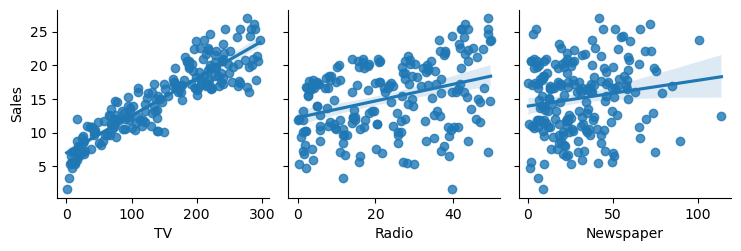

In [272]:
sns.pairplot(diag_kind=None, data= advertising, x_vars=["TV","Radio","Newspaper"], y_vars="Sales",aspect=1,kind='reg')
plt.show()

In [ ]:
As the value of Sales depends upon all the aspects, therefore we took all the data and tried to get the approximated linear Best Fit. 

**3. Training Accuracy.**

After applying the OLS regression method on the training data (original and predicted), we got an insight of R-squared and Adj.R-squared. <br>
Here both the values are equivalent.<br>
Thus, the accuracy of the training data is **91%**

**4. Test Accuracy.**

After applying the R square method on the test data (original and predicted).<br>
we got the percentage of test accuracy as **86.55%**.

**5. Final Result.**

We have done approximately all the possible commands to make this machine learning model predict the value of Sales
 wrt the advertising of TV, Radio and Newspaper.
 And the predicted value of Sales could be 86.5% accurate.<br>
 *Note: Refer from Actual and Predicted Sales Graph*

## Group-24